# Importing libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Changing the working directory:

In [2]:
os.chdir("E:\Project1")
os.getcwd()

'E:\\Project1'

#### Merging all the files into one dataframe:

In [60]:
files =[file for file in os.listdir('./Sales_Data')]
print(files)

df = pd.DataFrame()

for file in files:
    df_monthly = pd.read_csv('./Sales_Data/'+file)
    df = pd.concat([df_monthly, df])
df

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [62]:
df.shape

(186850, 6)

# Cleaning Data

In [63]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

These rows can be same NAN rows or rows with equal number of NAN

Let use see rows with NAN values:

In [64]:
df_nan = df[df.isna().any(axis=1)]
df_nan

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
198,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
16763,NaN,NaN,NaN,NaN,NaN,NaN
16912,NaN,NaN,NaN,NaN,NaN,NaN
17060,NaN,NaN,NaN,NaN,NaN,NaN
17446,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_nan.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,0,0,0,0,0,0
unique,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN


We can be sure about the rows being NAN altogether with full data. Therefore we can drop them:

In [66]:
df.dropna(axis=0, inplace=True)

In [67]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


Let us check if there are still any NAN data left in the dataframe:

In [68]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Therefore the data is cleaned.

## Adding months column:

We can see the date in format as:

In [69]:
df["Order Date"].dtypes

dtype('O')

It is of type object, but we need to convert it to month:

In [70]:
df["Order Month"]  = df["Order Date"].str[:2]
df["Order Year"]  = "20"+(df["Order Date"].str[6:8])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09,2019
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09,2019
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09,2019
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09,2019
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09,2019
...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",04,2019
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",04,2019
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",04,2019
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",04,2019


In [71]:
df["Order Month"] = df["Order Month"].astype('float')
df["Order Year"] = df["Order Year"].astype('float')

ValueError: could not convert string to float: 'Or'

Here we can see we have an error 'Or' which means there is value with Or as first 2 elements. 

Let us find those value:

In [72]:
df[df["Order Month"]=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,20Da
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,20Da
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,20Da
4323,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,20Da
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,20Da
...,...,...,...,...,...,...,...,...
15280,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,20Da
17208,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,20Da
17324,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,20Da
17339,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,20Da


In [73]:
df.drop(df[df["Order Month"] == 'Or'].index, inplace=True)

In [74]:
df[df["Order Month"]=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year


We have filtered our data.

In [75]:
df["Order Month"] = df["Order Month"].astype('int32')
df["Order Year"] = df["Order Year"].astype('int32')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,2019
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,2019
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,2019
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,2019
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,2019
...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4,2019
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4,2019
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4,2019
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4,2019


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 18382
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          182735 non-null  object
 1   Product           182735 non-null  object
 2   Quantity Ordered  182735 non-null  object
 3   Price Each        182735 non-null  object
 4   Order Date        182735 non-null  object
 5   Purchase Address  182735 non-null  object
 6   Order Month       182735 non-null  int32 
 7   Order Year        182735 non-null  int32 
dtypes: int32(2), object(6)
memory usage: 11.2+ MB


### We can see wrong datatype has been alloted to most columns.

In [77]:
df["Order ID"] = df["Order ID"].astype("int64")
df["Quantity Ordered"] = df["Quantity Ordered"].astype("int32")
df["Price Each"] = df["Price Each"].astype("float") 

# We can use pd.to_numeric syntax for converting it to numeric. Little more flexibility with it is that it automatically 
# Decides the best numeric data type for the data.

## What was the best month for sale and what was the sale that month?

To answer this question, we need sales. This can be found out by multiplying quantities by price:

In [78]:
df["Sales"] = df["Quantity Ordered"]*df["Price Each"]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,2019,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,2019,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,2019,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,2019,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,2019,11.95
...,...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4,2019,600.00
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4,2019,3.84
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4,2019,5.98
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4,2019,3.84


In [79]:
df_sale_month = df.groupby(["Order Month"], as_index=False).sum()
df_sale_month

,Order Month,Order ID,Quantity Ordered,Price Each,Order Year,Sales
0,1,1391148846,10670,1776155.79,19180534,1786511.29
1,2,1832181724,13162,2145208.87,23674794,2158127.48
2,3,2520234917,16697,2740393.12,30058872,2755969.40
3,4,3333217539,20226,3313522.35,36309696,3336376.42
4,5,3289290354,18344,3084756.09,32877396,3101881.04
5,6,2876409942,14964,2508863.49,26836548,2524464.99
6,7,3224356195,15781,2572764.75,28330608,2587444.91
7,8,2840777365,13185,2178183.81,23660661,2191698.31
8,9,2886380303,12827,2038019.59,22966125,2050361.26
9,10,5374745444,22356,3658884.86,40325487,3679254.16


In [80]:
df_sale_month[df_sale_month["Sales"]==df_sale_month["Sales"].max()]

,Order Month,Order ID,Quantity Ordered,Price Each,Order Year,Sales
11,12,7593831188,27764,4533151.68,49828920,4557905.42


Therefore, we can say that maximum sale was in the month of 12, i.e. December.

We can even plot the same to visualise the data:

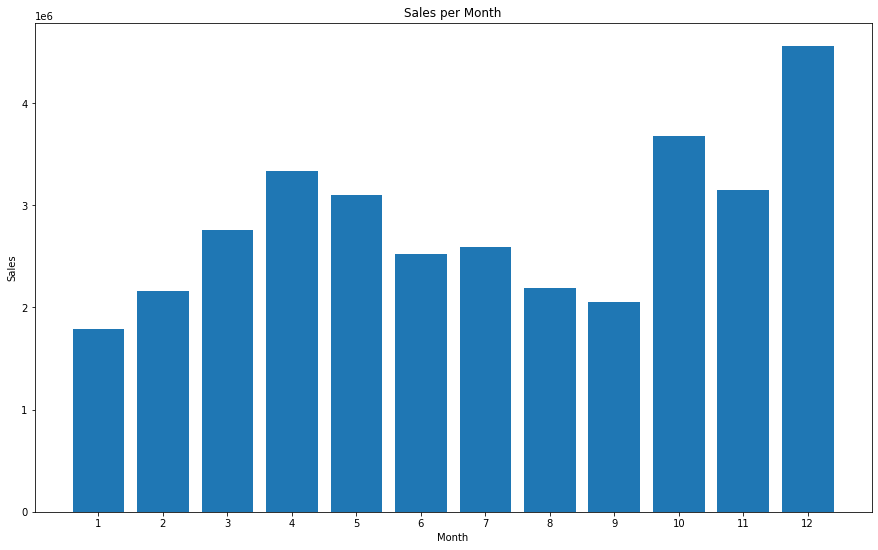

In [81]:
plt.figure(figsize=(15, 9))
plt.bar(df_sale_month["Order Month"], df_sale_month["Sales"])
plt.xticks(df_sale_month["Order Month"])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales per Month")
plt.show()

## Which city had the highest number of sales?

In [82]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,2019,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,2019,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,2019,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,2019,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,2019,11.95
...,...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4,2019,600.00
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4,2019,3.84
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4,2019,5.98
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4,2019,3.84


The best method to do this is by converting purchase address into another column with city:

In [83]:
df["Purchase Address"].dtype

dtype('O')

We can use apply method to split the data by commas:

In [84]:
df["City"] = df["Purchase Address"].apply(lambda x: x.split(",")[1])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,2019,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,2019,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,2019,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,2019,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,2019,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4,2019,3.84,Austin
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4,2019,5.98,San Francisco
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4,2019,3.84,Portland


But we can't solely rely on city name, as there can be cities with same name but which are actually different:

In [85]:
df["City"] = df["Purchase Address"].apply(lambda x: x.split(",")[1] + " " + x.split(",")[2].split(" ")[1])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,2019,15.36,Los Angeles CA
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,2019,23.90,Austin TX
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,2019,11.95,Los Angeles CA
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,2019,149.99,Seattle WA
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,2019,11.95,Atlanta GA
...,...,...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles CA
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4,2019,3.84,Austin TX
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4,2019,5.98,San Francisco CA
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4,2019,3.84,Portland OR


Grouping the data by city:

In [86]:
df_sale_city = df.groupby(["City"], as_index=False).sum()
df_sale_city = df_sale_city[["City","Sales"]].sort_values(by="Sales", ascending=False)
df_sale_city

,City,Sales
8,San Francisco CA,8124120.94
4,Los Angeles CA,5354039.93
5,New York City NY,4581658.91
2,Boston MA,3604080.86
0,Atlanta GA,2741642.05
3,Dallas TX,2717793.72
9,Seattle WA,2693048.60
7,Portland OR,1832538.71
1,Austin TX,1786745.52
6,Portland ME,444110.53


Therefore we can say that the maximum sale was for the city San Francisco CA.

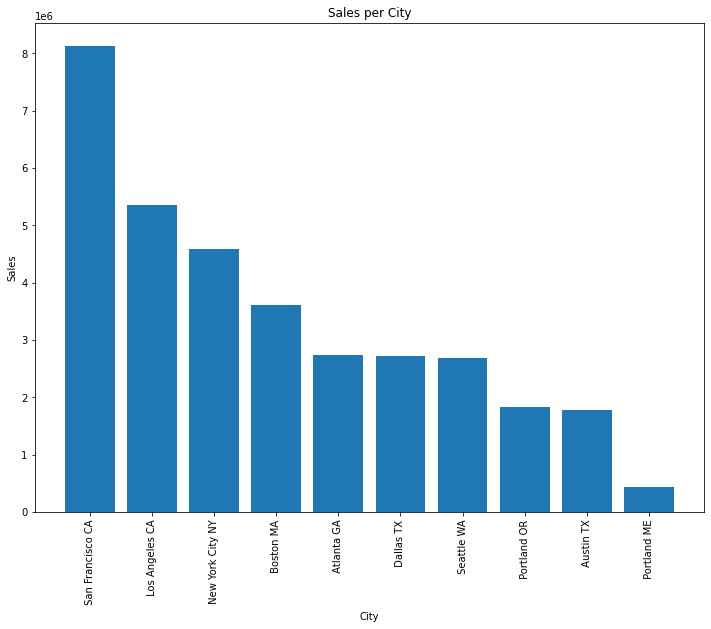

In [87]:
plt.figure(figsize=(12,9))
plt.bar(df_sale_city["City"], df_sale_city["Sales"])
plt.xticks(rotation = 90)
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Sales per City")
plt.show()

## What time we should display advertisement to maximize likelihood of costumer's buying product?

In [88]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,2019,15.36,Los Angeles CA
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,2019,23.90,Austin TX
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,2019,11.95,Los Angeles CA
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,2019,149.99,Seattle WA
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,2019,11.95,Atlanta GA
...,...,...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles CA
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4,2019,3.84,Austin TX
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4,2019,5.98,San Francisco CA
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4,2019,3.84,Portland OR


T0 convery Order Date to hour and minutes what we can do is split it again using indexing or used parsed_datetime:

In [89]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,15.36,Los Angeles CA
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,23.90,Austin TX
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,11.95,Los Angeles CA
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,149.99,Seattle WA
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,11.95,Atlanta GA
...,...,...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles CA
18379,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,2019,3.84,Austin TX
18380,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,2019,5.98,San Francisco CA
18381,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,2019,3.84,Portland OR


In [90]:
df["Hours"] = df["Order Date"].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Sales,City,Hours
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,15.36,Los Angeles CA,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,23.90,Austin TX,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,11.95,Los Angeles CA,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,149.99,Seattle WA,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,11.95,Atlanta GA,19
...,...,...,...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles CA,17
18379,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,2019,3.84,Austin TX,16
18380,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,2019,5.98,San Francisco CA,14
18381,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,2019,3.84,Portland OR,15


In [91]:
df_sale_hour = df[["Sales", "Hours"]].groupby(["Hours"], as_index=False).count()
df_sale_hour

,Hours,Sales
0,0,3844
1,1,2313
2,2,1227
3,3,816
4,4,843
5,5,1293
6,6,2445
7,7,3945
8,8,6184
9,9,8583


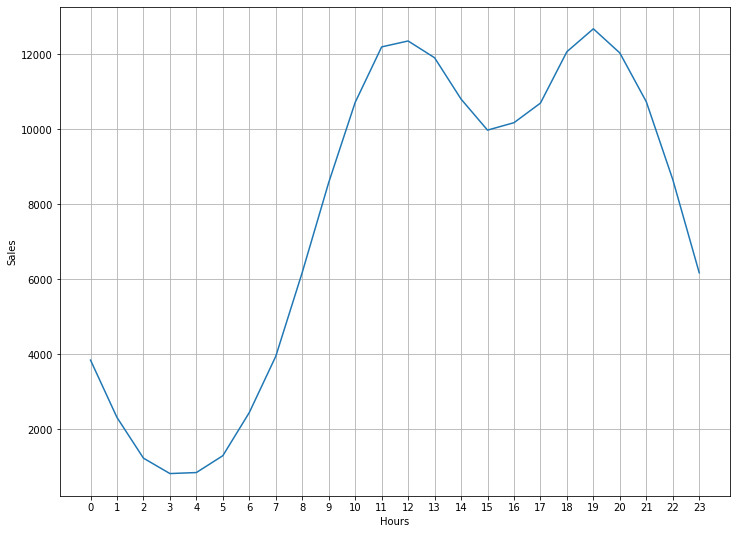

In [92]:
plt.figure(figsize=(12,9))
plt.plot(df_sale_hour["Hours"], df_sale_hour["Sales"])
plt.xticks(df_sale_hour["Hours"])
plt.xlabel("Hours")
plt.ylabel("Sales")
plt.grid()
plt.show()

Therefore we can see there is a peak at 11am and 7pm. So the best time to display advertisment is just around 11am or 7pm. 

## What products are most often sold together?

In [93]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Sales,City,Hours
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,15.36,Los Angeles CA,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,23.90,Austin TX,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,11.95,Los Angeles CA,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,149.99,Seattle WA,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,11.95,Atlanta GA,19
...,...,...,...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles CA,17
18379,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,2019,3.84,Austin TX,16
18380,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,2019,5.98,San Francisco CA,14
18381,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,2019,3.84,Portland OR,15


In [95]:
df_order = df[df["Order ID"].duplicated(keep=False)]
df_order

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Sales,City,Hours
20,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,2019,11.95,New York City NY,15
21,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,2019,11.95,New York City NY,15
60,248210,iPhone,1,700.00,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,2019,700.00,San Francisco CA,10
61,248210,Lightning Charging Cable,1,14.95,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,2019,14.95,San Francisco CA,10
70,248219,Bose SoundSport Headphones,1,99.99,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,2019,99.99,Los Angeles CA,12
...,...,...,...,...,...,...,...,...,...,...,...
18336,194050,USB-C Charging Cable,1,11.95,2019-04-27 00:27:00,"997 9th St, San Francisco, CA 94016",4,2019,11.95,San Francisco CA,0
18342,194056,iPhone,1,700.00,2019-04-10 10:05:00,"280 7th St, San Francisco, CA 94016",4,2019,700.00,San Francisco CA,10
18343,194056,Lightning Charging Cable,1,14.95,2019-04-10 10:05:00,"280 7th St, San Francisco, CA 94016",4,2019,14.95,San Francisco CA,10
18348,194061,iPhone,1,700.00,2019-04-14 20:22:00,"209 6th St, Atlanta, GA 30301",4,2019,700.00,Atlanta GA,20


Using this command, we can get the duplicated rows by "Order Date"

In [96]:
df_order["Grouped"] = df_order.groupby(["Order ID"])["Product"].transform(lambda x: ",".join(x))
df_order

C:\Users\Sahil\AppData\Local\Temp\ipykernel_27428\3009423573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order["Grouped"] = df_order.groupby(["Order ID"])["Product"].transform(lambda x: ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Sales,City,Hours,Grouped
20,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,2019,11.95,New York City NY,15,"USB-C Charging Cable,USB-C Charging Cable"
21,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,2019,11.95,New York City NY,15,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,iPhone,1,700.00,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,2019,700.00,San Francisco CA,10,"iPhone,Lightning Charging Cable"
61,248210,Lightning Charging Cable,1,14.95,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,2019,14.95,San Francisco CA,10,"iPhone,Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.99,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,2019,99.99,Los Angeles CA,12,"Bose SoundSport Headphones,Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...,...
18336,194050,USB-C Charging Cable,1,11.95,2019-04-27 00:27:00,"997 9th St, San Francisco, CA 94016",4,2019,11.95,San Francisco CA,0,"AA Batteries (4-pack),USB-C Charging Cable"
18342,194056,iPhone,1,700.00,2019-04-10 10:05:00,"280 7th St, San Francisco, CA 94016",4,2019,700.00,San Francisco CA,10,"iPhone,Lightning Charging Cable"
18343,194056,Lightning Charging Cable,1,14.95,2019-04-10 10:05:00,"280 7th St, San Francisco, CA 94016",4,2019,14.95,San Francisco CA,10,"iPhone,Lightning Charging Cable"
18348,194061,iPhone,1,700.00,2019-04-14 20:22:00,"209 6th St, Atlanta, GA 30301",4,2019,700.00,Atlanta GA,20,"iPhone,Lightning Charging Cable"


We only want one value therefore we can drop duplicates:

In [97]:
df_order = df_order[["Order ID", "Grouped"]].drop_duplicates()
df_order.reset_index(inplace=True)
df_order.drop(["index"], axis = 1, inplace=True)
df_order

,Order ID,Grouped
0,248171,"USB-C Charging Cable,USB-C Charging Cable"
1,248210,"iPhone,Lightning Charging Cable"
2,248219,"Bose SoundSport Headphones,Google Phone"
3,248265,"Vareebadd Phone,Bose SoundSport Headphones"
4,248323,"Google Phone,Bose SoundSport Headphones"
...,...,...
6923,194008,"AA Batteries (4-pack),Wired Headphones"
6924,194021,"Google Phone,Wired Headphones"
6925,194050,"AA Batteries (4-pack),USB-C Charging Cable"
6926,194056,"iPhone,Lightning Charging Cable"


We need to count the occurance of each Grouped :

In [98]:
df_order.groupby("Grouped", as_index=False).count().sort_values(by="Order ID", ascending=False).head()

,Grouped,Order ID
338,"iPhone,Lightning Charging Cable",860
173,"Google Phone,USB-C Charging Cable",828
358,"iPhone,Wired Headphones",355
296,"Vareebadd Phone,USB-C Charging Cable",301
190,"Google Phone,Wired Headphones",295


This tell us a little about pairs. Like pairs are sold the most and the pair of Iphone and Lightning Charging Cable are sold the most together. But what is the maximum for triples? 

To accomplish this, we need to import some more libraries:

In [99]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_order["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
count.most_common(1)

[(('iPhone', 'Lightning Charging Cable'), 973)]

In [100]:
count = Counter()

for row in df_order["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 3)))
count.most_common(1)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 82)]

In [101]:
count = Counter()

for row in df_order["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 4)))
count.most_common(1)

[(('iPhone',
   'Lightning Charging Cable',
   'Apple Airpods Headphones',
   'Wired Headphones'),
  4)]

Therefore by this method, we can find out pair, triples and quadruples that are sold together maximum.

## What product are sold the most?

In [102]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Sales,City,Hours
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,15.36,Los Angeles CA,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,23.90,Austin TX,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,11.95,Los Angeles CA,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,149.99,Seattle WA,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,11.95,Atlanta GA,19
...,...,...,...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles CA,17
18379,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,2019,3.84,Austin TX,16
18380,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,2019,5.98,San Francisco CA,14
18381,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,2019,3.84,Portland OR,15


In [123]:
df_most = df.groupby("Product", as_index=False).sum()
df_most[["Product", "Quantity Ordered", "Sales"]].sort_values(by="Quantity Ordered", ascending = False)

,Product,Quantity Ordered,Sales
5,AAA Batteries (4-pack),30487,91156.13
4,AA Batteries (4-pack),27148,104248.32
15,USB-C Charging Cable,23555,281482.25
12,Lightning Charging Cable,22841,341472.95
17,Wired Headphones,20201,242209.99
6,Apple Airpods Headphones,15383,2307450.00
7,Bose SoundSport Headphones,13236,1323467.64
2,27in FHD Monitor,7429,1114275.71
18,iPhone,6732,4712400.00
1,27in 4K Gaming Monitor,6134,2392198.66


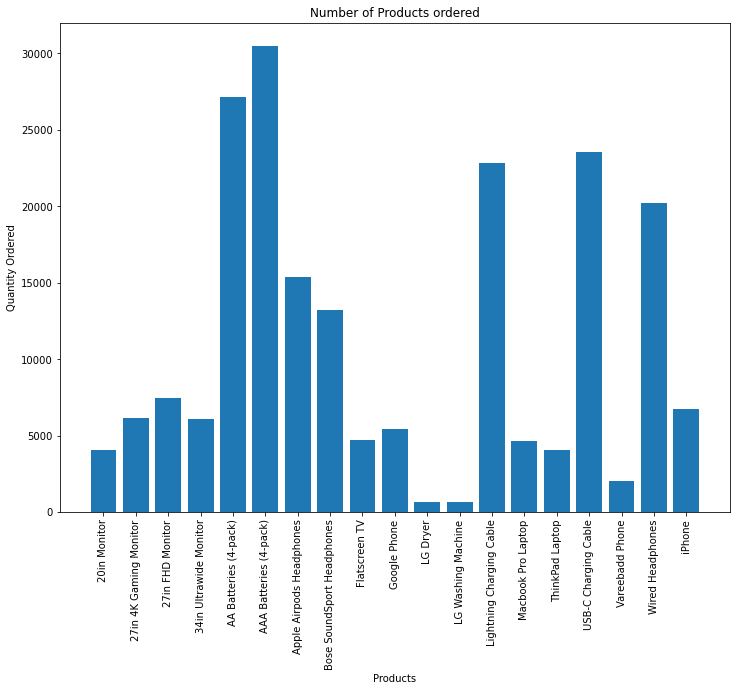

In [124]:
plt.figure(figsize=(12,9))
plt.bar(df_most["Product"], df_most["Quantity Ordered"])
plt.xticks(rotation = 90)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.title("Number of Products ordered")
plt.show()

Let us see if there is a relationship between Quantity and Price of product:

We can do this by adding price column to df_most

In [128]:
df_most["Price"] = df.groupby(["Product"], as_index=False).mean()["Price Each"]
df_most = df_most[["Product", "Quantity Ordered", "Price"]]
df_most

,Product,Quantity Ordered,Price
0,20in Monitor,4058,109.99
1,27in 4K Gaming Monitor,6134,389.99
2,27in FHD Monitor,7429,149.99
3,34in Ultrawide Monitor,6076,379.99
4,AA Batteries (4-pack),27148,3.84
5,AAA Batteries (4-pack),30487,2.99
6,Apple Airpods Headphones,15383,150.00
7,Bose SoundSport Headphones,13236,99.99
8,Flatscreen TV,4724,300.00
9,Google Phone,5440,600.00


In [129]:
df_most.corr()

,Quantity Ordered,Price
Quantity Ordered,1.000000,-0.601458
Price,-0.601458,1.000000


We can see there is a negative correaltion, i.e. when price goes up sales goes down and vice versa

<AxesSubplot:xlabel='Price', ylabel='Quantity Ordered'>

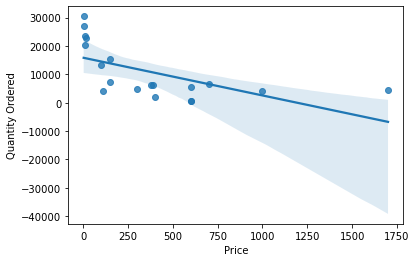

In [130]:
import seaborn as sns
sns.regplot(x = "Price", y = "Quantity Ordered", data = df_most)

Another way of doing this could be by plotting an overlay graph on bar graph above:

C:\Users\Sahil\AppData\Local\Temp\ipykernel_27428\2827139419.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df["Product"],rotation = 'vertical')


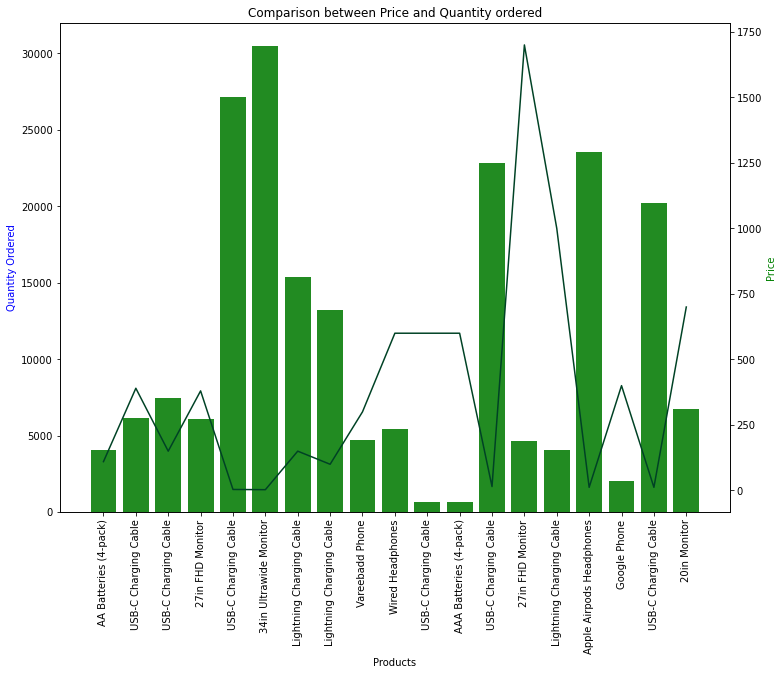

In [171]:
fig, ax1 = plt.subplots(figsize=(12,9))
ax2 = ax1.twinx()
ax1.bar(df_most["Product"], df_most["Quantity Ordered"],color="#228b22")
ax2.plot(df_most["Product"], df_most["Price"], "#004225")

ax1.set_xticklabels(df["Product"],rotation = 'vertical')
ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered", color = "b")
ax2.set_ylabel("Price", color = "g")
ax1.set_title("Comparison between Price and Quantity ordered")
plt.show()